In [1]:
import numpy as np
import os
import requests
import torch
import matplotlib.pyplot as plt

In [4]:
def load_deepsea1(path, batch_size, one_hot = True, valid_split=-1,rc_aug=False, shift_aug=False):
    print(f'Loading the data')
    filename = path

    if not os.path.isfile(filename):
        with open(filename, 'wb') as f:
            f.write(requests.get("https://pde-xd.s3.amazonaws.com/deepsea/deepsea_filtered.npz").content)
    
    data = np.load(filename,allow_pickle=True)
    
    if valid_split > 0:
        if one_hot:
            x_train = torch.from_numpy(data['x_train']).transpose(-1, -2).float()
        else:
            x_train = torch.from_numpy(np.argmax(data['x_train'], axis=2)).unsqueeze(-2).float()
        y_train = torch.from_numpy(data['y_train']).float() 
        if one_hot:
            x_val = torch.from_numpy(data['x_val']).transpose(-1, -2).float() # shape = (2490, 1000, 4)
        else:
            x_val = torch.from_numpy(np.argmax(data['x_val'], axis=2)).unsqueeze(-2).float() 
        y_val = torch.from_numpy(data['y_val']).float() # shape = (2490, 36)

    else:
        if one_hot:
            x_train = torch.from_numpy(np.concatenate((data['x_train'], data['x_val']), axis=0)).transpose(-1, -2).float() 
        else:
            x_train = torch.from_numpy(np.argmax(np.concatenate((data['x_train'], data['x_val']), axis=0), axis=2)).unsqueeze(-2).float()
        y_train = torch.from_numpy(np.concatenate((data['y_train'], data['y_val']), axis=0)).float() 

    if one_hot:
        x_test = torch.from_numpy(data['x_test']).transpose(-1, -2).float() # shape = (149400, 1000, 4)
    else:
        x_test = torch.from_numpy(np.argmax(data['x_test'], axis=2)).unsqueeze(-2).float()
    y_test = torch.from_numpy(data['y_test']).float() # shape = (149400, 36)

    
    return x_train,x_val,x_test,y_train,y_val,y_test

In [5]:
x_train,x_val,x_test,y_train,y_val,y_test = load_deepsea1('/Users/lilin/Desktop/02750_automation/data_analysis/deepsea_filtered.npz', 32, one_hot = True, valid_split=1,rc_aug=False, shift_aug=False)

Loading the data


In [27]:
y_total = torch.cat([y_train,y_val,y_test],dim=0)

In [7]:
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_total shape: {y_total.shape}")

y_train shape: torch.Size([71753, 36])
y_val shape: torch.Size([2490, 36])
y_test shape: torch.Size([149004, 36])
y_total shape: torch.Size([223247, 36])


In [8]:
print(f"total number of samples: {y_train.shape[0]+y_val.shape[0]+y_test.shape[0]}")

total number of samples: 223247


In [28]:
class_count_y_total_positive = y_total.sum(axis=0)
class_count_y_total_negative =y_total.shape[0] - y_total.sum(axis=0)

Text(0.5, 1.0, ' Nas-Bench-360')

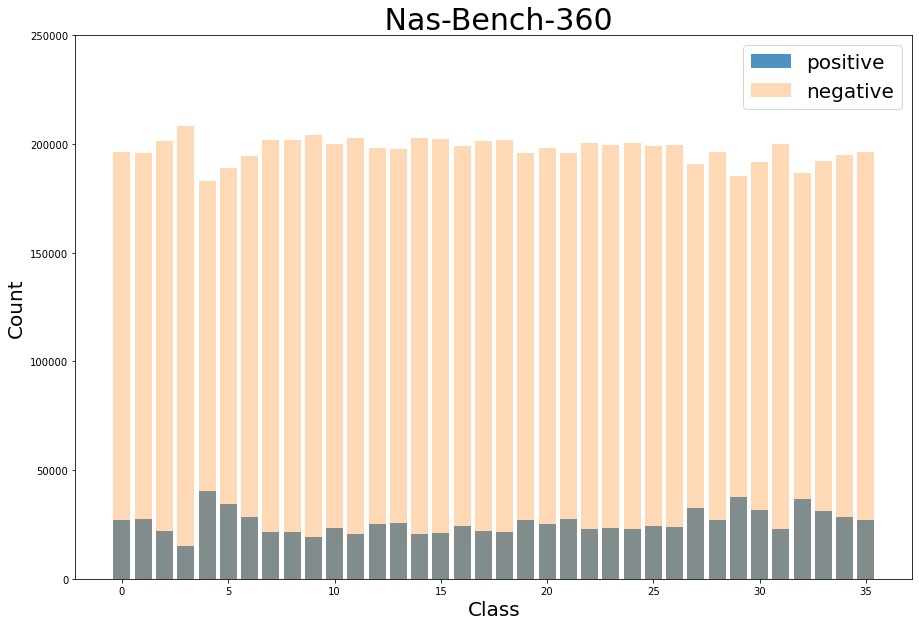

In [29]:
plt.figure(figsize=(15,10))
plt.bar(range(0,len(class_count_y_total_positive)), class_count_y_total_positive,alpha=0.8,label="positive",align="center")
plt.bar(range(0,len(class_count_y_total_negative)), class_count_y_total_negative,alpha=0.3,label="negative",align="center")
plt.xlabel("Class",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.ylim((0,250000))
plt.legend(fontsize=20)
plt.title(" Nas-Bench-360",fontsize=30)


